In [ ]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading The DataSets

In [ ]:
confirmed =pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
country_code = pd.read_csv('country_code_mapping.csv')

In [ ]:
country_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       249 non-null    object 
 1   alpha-2_code  245 non-null    object 
 2   alpha-3_code  249 non-null    object 
 3   numeric_code  247 non-null    float64
 4   iso_3166-2    246 non-null    object 
dtypes: float64(1), object(4)
memory usage: 9.9+ KB


In [ ]:
confirmed.isnull().sum()

Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
12/2/22             0
12/3/22             0
12/4/22             0
12/5/22             0
12/6/22             0
Length: 1054, dtype: int64

In [ ]:
deaths.isnull().sum()

Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
12/2/22             0
12/3/22             0
12/4/22             0
12/5/22             0
12/6/22             0
Length: 1054, dtype: int64

## Drop Unnecessary Data

In [ ]:
confirmed.drop(['Lat','Long','Province/State'], axis = 1,inplace = True)
deaths.drop(['Lat','Long','Province/State'], axis = 1,inplace = True)

## Aggregate (sum) Data on Country/Region

In [ ]:
confirmed = confirmed.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

In [ ]:
confirmed.reset_index(inplace=True)
deaths.reset_index(inplace=True)

In [ ]:
confirmed

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22,12/6/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,205612,205802,205830,205907,206073,206133,206145,206206,206273,206331
1,Albania,0,0,0,0,0,0,0,0,0,...,333330,333330,333338,333343,333360,333381,333391,333408,333413,333455
2,Algeria,0,0,0,0,0,0,0,0,0,...,271061,271079,271082,271090,271096,271100,271102,271107,271113,271122
3,Andorra,0,0,0,0,0,0,0,0,0,...,46824,46824,46824,47219,47219,47219,47219,47219,47219,47219
4,Angola,0,0,0,0,0,0,0,0,0,...,104491,104491,104491,104676,104676,104676,104676,104676,104750,104750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,703036
197,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
198,Yemen,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
199,Zambia,0,0,0,0,0,0,0,0,0,...,333721,333721,333746,333746,333746,333746,333746,333746,333746,333746


In [ ]:
deaths

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22,12/6/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7833,7833,7833,7833,7834,7834,7834,7834,7835,7835
1,Albania,0,0,0,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,Algeria,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,Andorra,0,0,0,0,0,0,0,0,0,...,156,156,156,157,157,157,157,157,157,157
4,Angola,0,0,0,0,0,0,0,0,0,...,1923,1923,1923,1924,1924,1924,1924,1924,1925,1925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
197,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,Yemen,0,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
199,Zambia,0,0,0,0,0,0,0,0,0,...,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019


## Merging Data Frames
#### Last Date represets the total of all the cases till date

In [ ]:
total_confirmed = confirmed[['Country/Region','12/5/22']]
total_deaths = deaths[['Country/Region','12/5/22']]

In [ ]:
total_confirmed.columns = ['Country','confirmed']
total_deaths.columns = ['Country','Detahs']

In [ ]:
total_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  201 non-null    object
 1   Detahs   201 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ KB


In [ ]:
total_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    201 non-null    object
 1   confirmed  201 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ KB


### Global Total Contry Wise Of Deaths & Confirmed Case

In [ ]:
global_df = pd.merge(total_confirmed,total_deaths)

In [ ]:
global_df

,Country,confirmed,Detahs
0,Afghanistan,206273,7835
1,Albania,333413,3594
2,Algeria,271113,6881
3,Andorra,47219,157
4,Angola,104750,1925
...,...,...,...
196,West Bank and Gaza,703036,5708
197,Winter Olympics 2022,535,0
198,Yemen,11945,2159
199,Zambia,333746,4019


## Global Total Confirmed & Deaths By date

In [ ]:
total1 = deaths.T
total2 = confirmed.T

In [ ]:
total1['Deaths'] = total1.sum(axis=1)
total2['Confirmed'] = total2.sum(axis=1)


In [ ]:
total1.reset_index(inplace=True)
total2.reset_index(inplace = True) 


In [ ]:
global_total_confirmed = total2[['index','Confirmed']][1:]
global_total_deaths = total1[['index','Deaths']][1:]

In [ ]:
global_total =  pd.merge(global_total_confirmed,global_total_deaths,on = 'index')

In [ ]:
global_total.columns = ['Date','Global_Confirmed','Global_Deaths']

In [ ]:
global_total['Date'] = pd.to_datetime(global_total['Date'])

In [ ]:
global_total

,Date,Global_Confirmed,Global_Deaths
0,2020-01-22,557,17
1,2020-01-23,657,18
2,2020-01-24,944,26
3,2020-01-25,1437,42
4,2020-01-26,2120,56
...,...,...,...
1045,2022-12-02,644733502,6639922
1046,2022-12-03,645032173,6640467
1047,2022-12-04,645288237,6641044
1048,2022-12-05,645806108,6642458


## Canada & US Merged Cases


In [ ]:
country = ['Canada', 'US']
final_df =pd.DataFrame()
for count in country:
        final_df = final_df.append(confirmed[confirmed['Country/Region']== count])
        final_df = final_df.append(deaths[deaths['Country/Region']== count])


In [ ]:
final_df = final_df.T

In [ ]:
final_df.reset_index(inplace=True)

In [ ]:
final_df.columns = ['Date','Canada_Confirmed','Canada_Deaths','Usa_Confirmed','Usa_Deaths']
final_df = final_df[1:]
final_df['Date'] = pd.to_datetime(final_df['Date'])

In [ ]:
final_df

,Date,Canada_Confirmed,Canada_Deaths,Usa_Confirmed,Usa_Deaths
1,2020-01-22,0,0,1,0
2,2020-01-23,2,0,1,0
3,2020-01-24,3,0,2,0
4,2020-01-25,3,0,2,0
5,2020-01-26,3,0,5,0
...,...,...,...,...,...
1046,2022-12-02,4444912,48133,98962019,1081412
1047,2022-12-03,4444912,48133,98967906,1081431
1048,2022-12-04,4444912,48133,98972375,1081431
1049,2022-12-05,4453001,48297,99023619,1081638


## Initializing the Api

In [ ]:
demo = 'ZTG83NQM6OS2EF6H'
ts = TimeSeries(key = demo, output_format='pandas')

In [ ]:
demo1 = 'GUF1WG74NP3ZQ4RR'
ts1 = TimeSeries(key = demo1, output_format='pandas')

### Selecting the stocks :
* Overall American Market - 'SPY' SPDR S&P 500 ETF Trust
* Overall Canadian Market - 'TSE' Toronto Stock Exchange 
* Travel sector - 'AG' Lufthansa Airlines
* The Real Estate sector - 'PLD' Prologis Inc
* Precious metals -  'GOLD' GOLD


In [ ]:
stock = ['SPY','TSE','AG','PLD','GOLD']
for tick in stock:
    data,meta_data = ts.get_daily_adjusted(symbol=tick, outputsize='full')
    data.reset_index(inplace=True)
    stock = data[['date','2. high','3. low']]
    hi = tick + '_H'
    lo = tick + '_L'
    li = ['Date',hi,lo]
    stock.columns = li
    final_df = final_df.merge(stock,on = 'Date')

In [ ]:
data1,meta_data1 = ts1.get_daily_adjusted(symbol='ZM', outputsize='full')
data1.reset_index(inplace=True)
stock1 = data1[['date','2. high','3. low']]
hi = 'ZM_H'
lo = 'ZM_L'
li = ['Date',hi,lo]
stock1.columns = li
final_df = final_df.merge(stock1,on = 'Date')

In [ ]:
final_df = final_df.merge(global_total, on = 'Date')

In [ ]:
final_df

,Date,Canada_Confirmed,Canada_Deaths,Usa_Confirmed,Usa_Deaths,SPY_H,SPY_L,TSE_H,TSE_L,AG_H,AG_L,PLD_H,PLD_L,GOLD_H,GOLD_L,ZM_H,ZM_L,Global_Confirmed,Global_Deaths
0,2020-01-22,0,0,1,0,332.95,331.17,34.250,33.310,10.63,10.290,96.380,93.720,18.4000,18.17,77.1056,75.4600,557,17
1,2020-01-23,2,0,1,0,332.17,329.41,34.070,32.200,10.59,10.150,95.750,93.120,18.6800,18.18,75.9700,74.2100,657,18
2,2020-01-24,3,0,2,0,332.53,327.36,33.920,32.390,10.63,10.200,96.780,95.570,18.7500,18.35,76.1850,72.3746,944,26
3,2020-01-27,3,0,5,0,325.12,322.66,32.110,31.148,10.88,10.100,96.060,94.840,19.1700,18.45,72.1317,70.3200,2929,82
4,2020-01-28,4,0,5,0,327.85,323.60,31.910,31.320,10.16,9.810,96.020,95.040,18.5000,17.85,72.4800,70.2600,5580,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,2022-11-30,4432426,48002,98807782,1080536,407.68,393.48,24.700,23.390,9.43,8.900,117.820,112.490,16.4400,15.87,75.4400,69.5400,643274699,6635473
722,2022-12-01,4444843,48133,98924207,1081147,410.00,404.75,25.440,24.520,9.63,9.135,119.490,115.740,17.3400,16.67,81.6900,75.8575,644001063,6637750
723,2022-12-02,4444912,48133,98962019,1081412,407.86,402.14,24.845,24.100,9.67,9.140,118.020,114.820,17.1400,16.58,76.3600,73.8500,644733502,6639922
724,2022-12-05,4453001,48297,99023619,1081638,404.93,398.17,24.350,23.630,9.47,8.990,116.240,113.735,16.9092,16.47,75.2200,72.5400,645806108,6642458


## Visualizing the canada and USA Merged Confirmed Cases over time

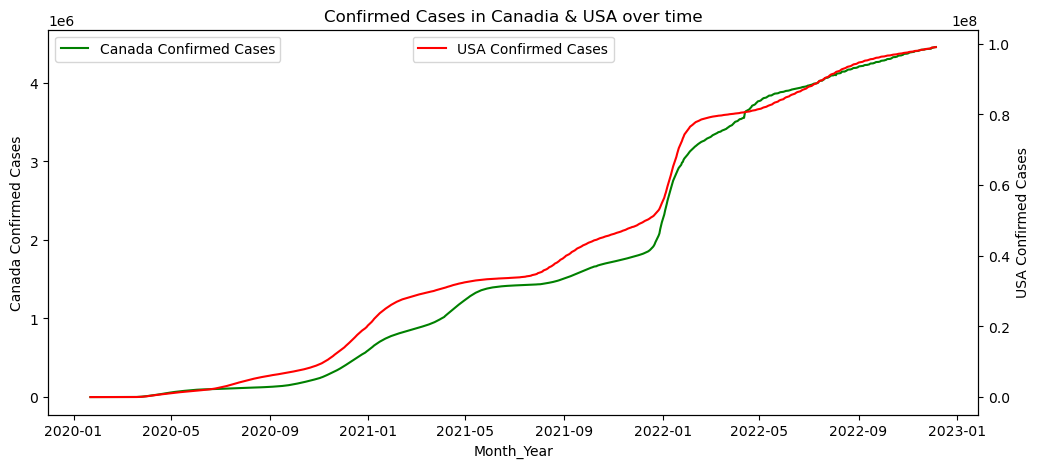

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
x = final_df['Date']
ax.set_title('Confirmed Cases in Canadia & USA over time')
ax.set_xlabel('Month_Year')
ax.plot(x, final_df['Canada_Confirmed'], color='green')
ax2.plot(x, final_df['Usa_Confirmed'], color='red')
ax.set_ylabel('Canada Confirmed Cases')
ax2.set_ylabel('USA Confirmed Cases')
ax.legend(['Canada Confirmed Cases'])
ax2.legend(['USA Confirmed Cases'], loc='upper center')
plt.show()

* USA spred faster in USA as compared to canada

## Visualizing the canada and USA Merged Deaths Over time

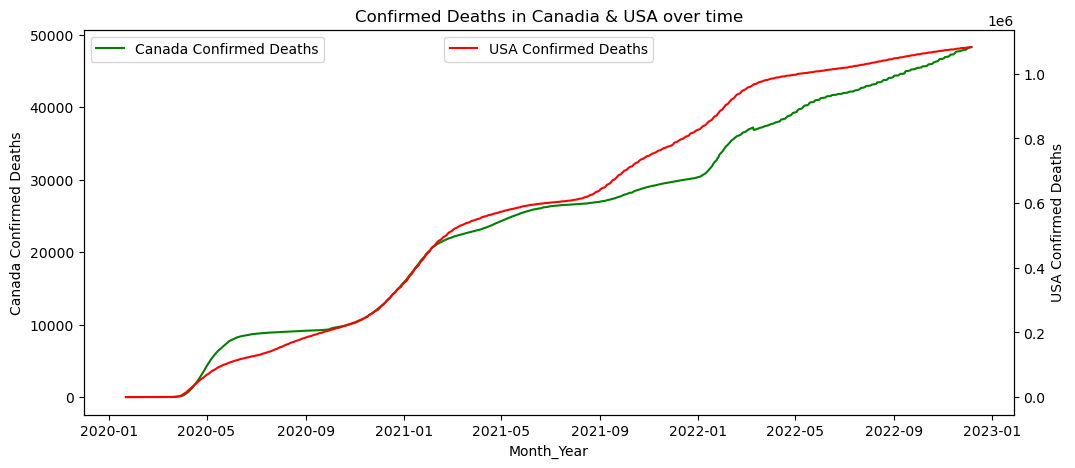

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
x = final_df['Date']
ax.set_title('Confirmed Deaths in Canadia & USA over time')
ax.set_xlabel('Month_Year')
ax.plot(x, final_df['Canada_Deaths'], color='green')
ax2.plot(x, final_df['Usa_Deaths'], color='red')
ax.set_ylabel('Canada Confirmed Deaths')
ax2.set_ylabel('USA Confirmed Deaths')
ax.legend(['Canada Confirmed Deaths'])
ax2.legend(['USA Confirmed Deaths'], loc='upper center')
plt.show()

* Deaths were higher in Canada initially, but USA had more deaths due to covid overtime.

### Real Estate Stok Over Time

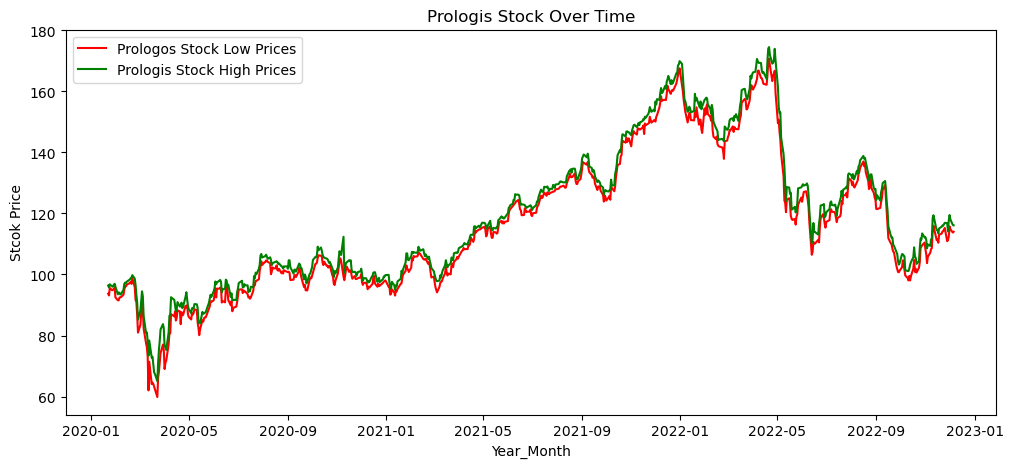

In [ ]:
fig = plt.figure(figsize=(12,5))
plt.plot(final_df["Date"], final_df["PLD_L"],color = 'red', label='Prologos Stock Low Prices')
plt.plot(final_df["Date"], final_df["PLD_H"],color = 'green' ,label='Prologis Stock High Prices')
plt.title("Prologis Stock Over Time")
plt.xlabel('Year_Month')
plt.ylabel('Stcok Price')
plt.legend()
plt.show()

* We can infer that Prologis Stock shrunk during the start of covid (Majorly first half of 2020). Later it rose back with time. 

## Canada Stock Over Time

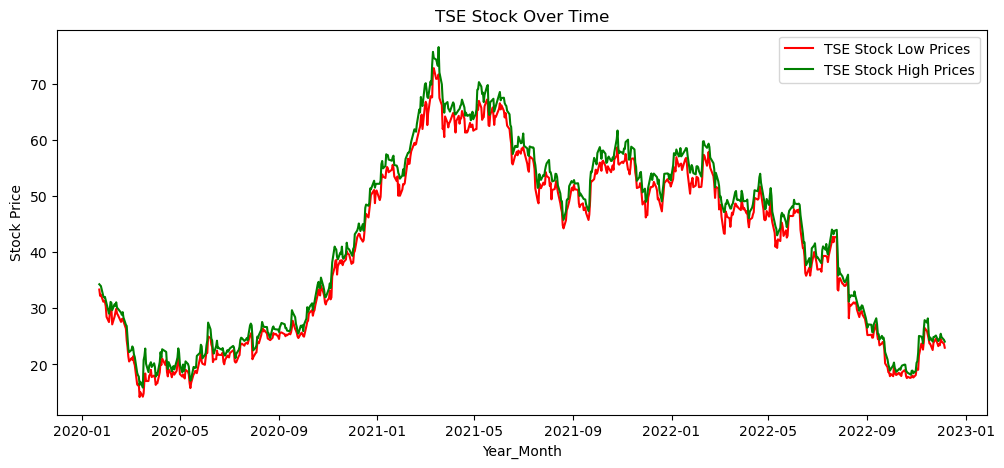

In [ ]:
fig = plt.figure(figsize=(12,5))
plt.plot(final_df["Date"], final_df["TSE_L"],color = 'red', label='TSE Stock Low Prices')
plt.plot(final_df["Date"], final_df["TSE_H"],color = 'green' ,label='TSE Stock High Prices')
plt.title("TSE Stock Over Time")
plt.xlabel('Year_Month')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

* TSE stock shrunk by a lot when covid hit initially but rose back with time, with another downfall during the laster parts of 2022 

## USa Stock Over time with confirmed cases

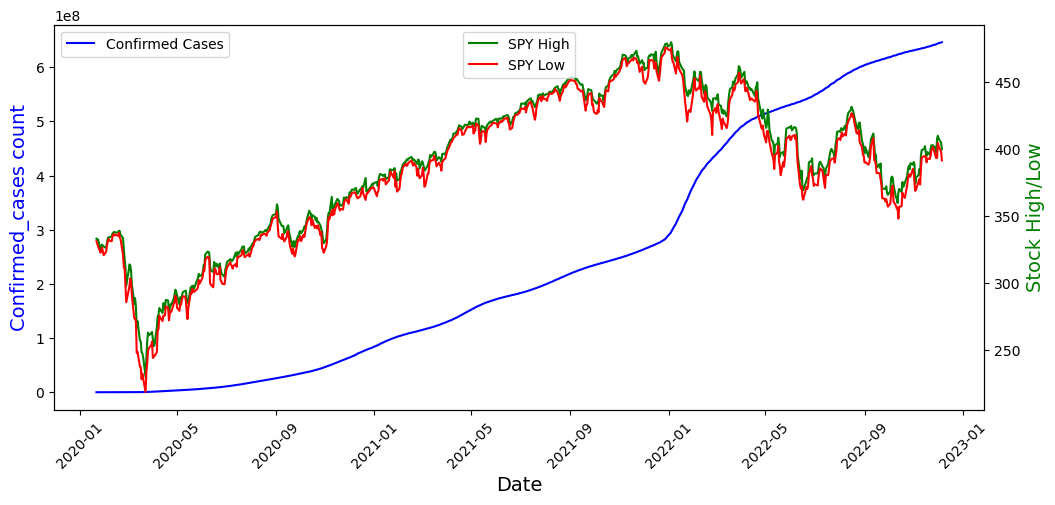

In [ ]:
#create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(12,5))
# make a plot
ax.plot(final_df['Date'], final_df['Global_Confirmed'], color="blue", label = 'Confirmed Cases')
# set x-axis label
ax.set_xlabel("Date", fontsize = 14)
# set y-axis label
ax.set_ylabel("Confirmed_cases count",color="blue",fontsize=14)
#Next we use twinx() function to create the second axis object “ax2”. Now we use the second axis object “ax2” to make plot of the second y-axis variable and update their labels.

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(final_df['Date'], final_df['SPY_H'],color="green", label = 'SPY High')
ax2.plot(final_df['Date'], final_df['SPY_L'],color="red", label = 'SPY Low')
ax2.set_ylabel("Stock High/Low",color="green",fontsize=14)
ax.tick_params(axis='x', labelrotation = 45)
#fig.set_size_inches(30, 10)
ax.legend(loc ='upper left')
ax2.legend(loc = 'upper center')
plt.show()

* initially the stock plunges wen covid hits but later it goes back to its normal state. with a later dip in 2022

## Plotting the gold stock compared to global confirmed cases

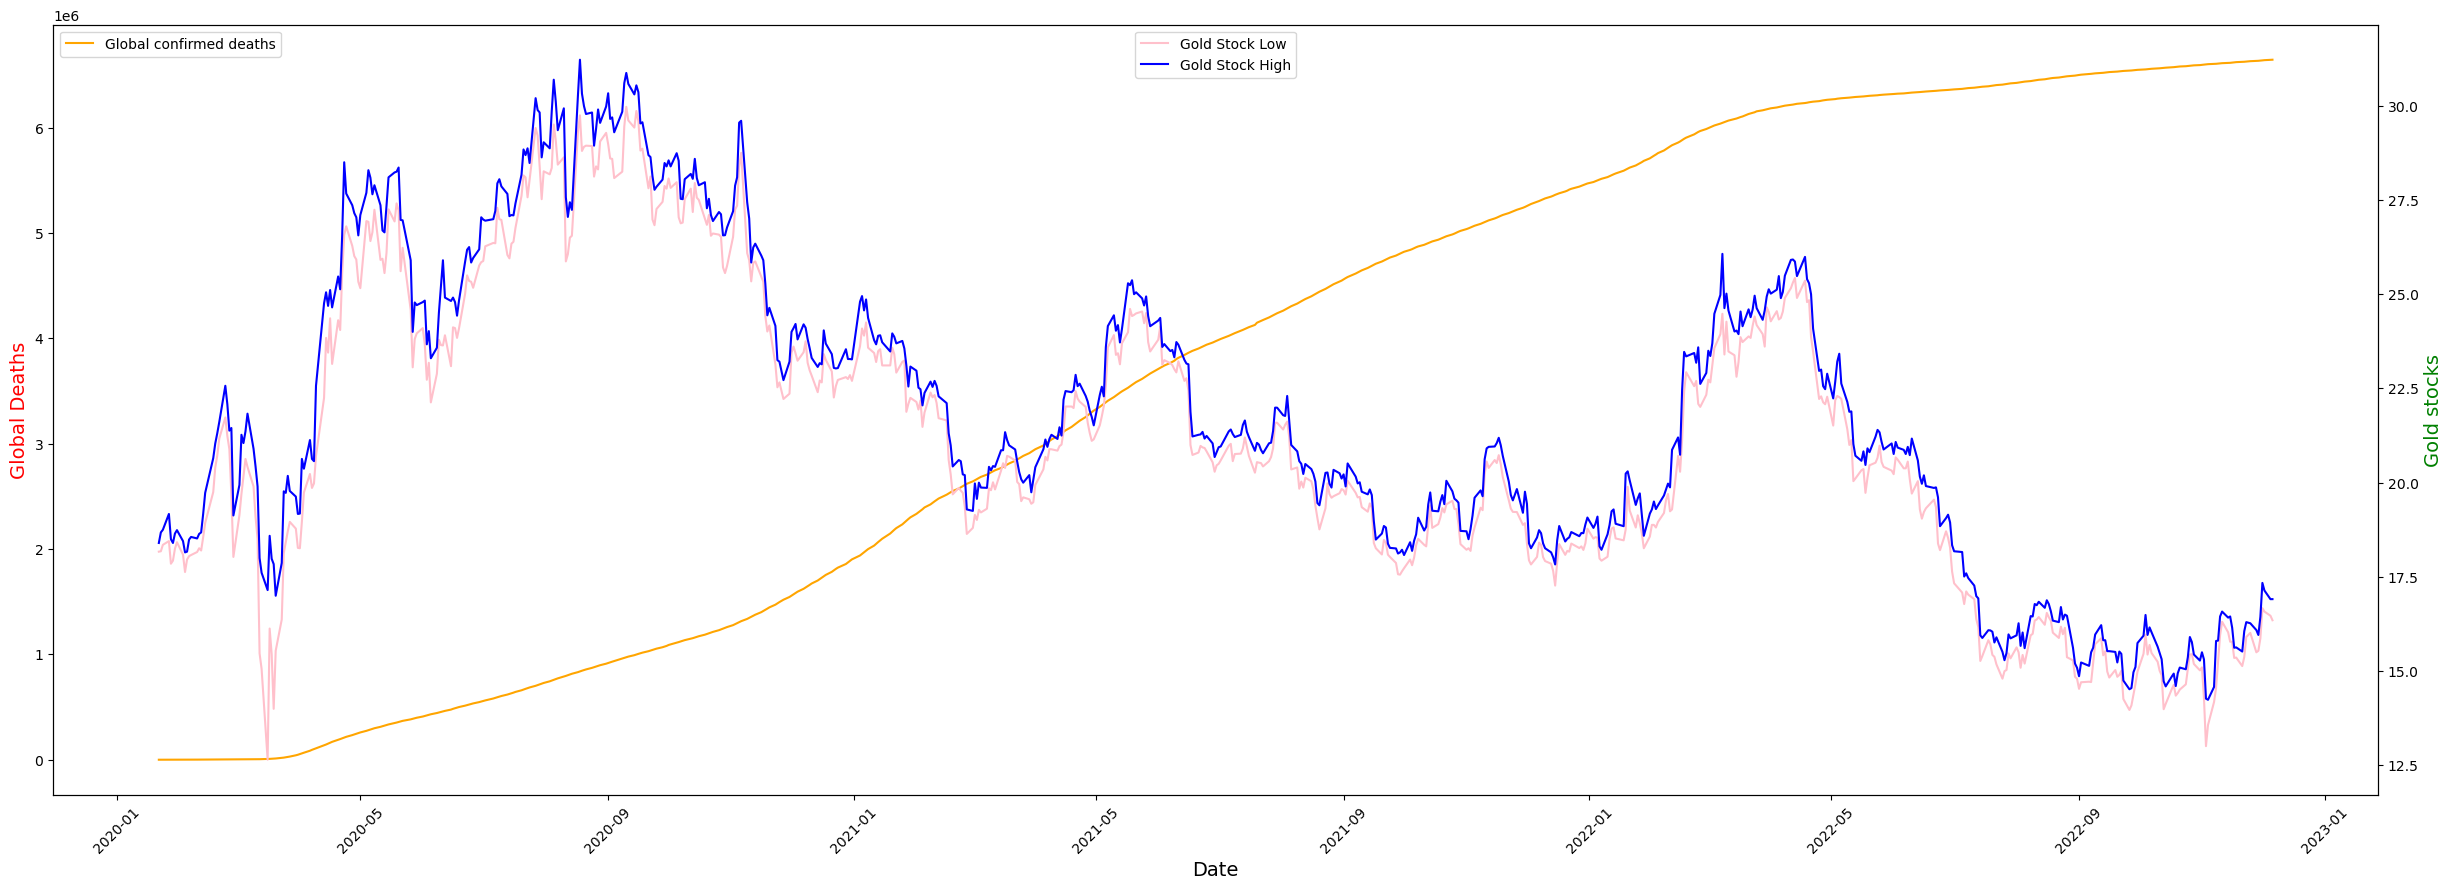

In [ ]:
#create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(final_df['Date'], final_df['Global_Deaths'], color="orange", label='Global confirmed deaths')
# set x-axis label
ax.set_xlabel("Date", fontsize = 14)
# set y-axis label
ax.set_ylabel("Global Deaths",
              color="red",
              fontsize=14)
#Next we use twinx() function to create the second axis object “ax2”. Now we use the second axis object “ax2” to make plot of the second y-axis variable and update their labels.

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(final_df['Date'], final_df['GOLD_L'],color="pink", label='Gold Stock Low')
ax2.plot(final_df['Date'], final_df['GOLD_H'],color="blue", label='Gold Stock High')
ax2.set_ylabel("Gold stocks",color="green",fontsize=14)
ax.tick_params(axis='x', labelrotation = 45)
fig.set_size_inches(30, 10)
ax.legend( loc='upper left')
ax2.legend(loc='upper center')
plt.show()

* Gold Plunges with the initial hit of covid and shows a gradual decrease in the stock price

## Plotting the stock for Travel airlines

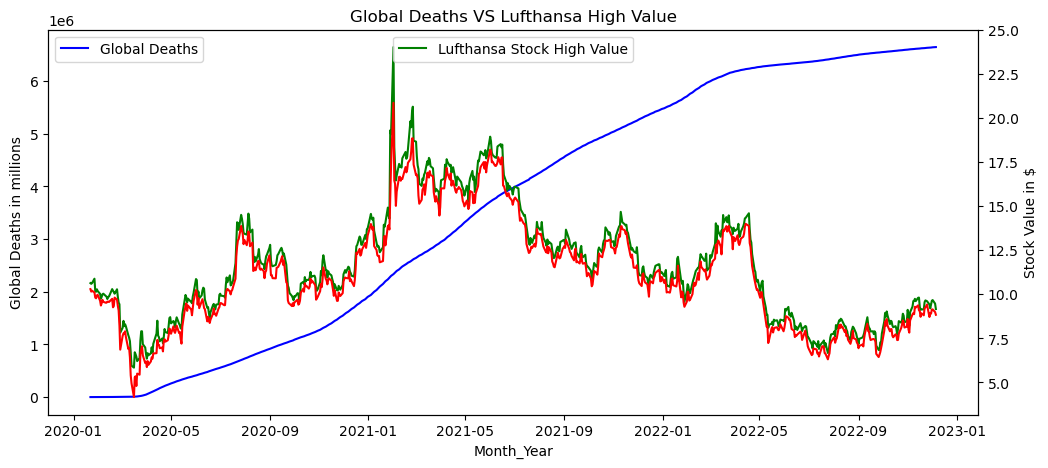

In [ ]:
# Creating plot based on Global Deaths, and date wise Lufthansa Stock Values

fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
x = final_df['Date']
ax.set_title('Global Deaths VS Lufthansa High Value')
ax.set_xlabel('Month_Year')
ax.plot(x, final_df['Global_Deaths'], color='blue')
ax2.plot(x, final_df['AG_H'], color='green')
ax2.plot(x, final_df['AG_L'], color='red')
ax.set_ylabel('Global Deaths in millions')
ax2.set_ylabel('Stock Value in $')
ax.legend(['Global Deaths'])
ax2.legend(['Lufthansa Stock High Value'], loc='upper center')
plt.show()

* Based on the visualization we can infer that, the stocks were performing well intially till death tolls shot up and the stocks fell really low after that

## Plotting for Technology stock (Zoom)

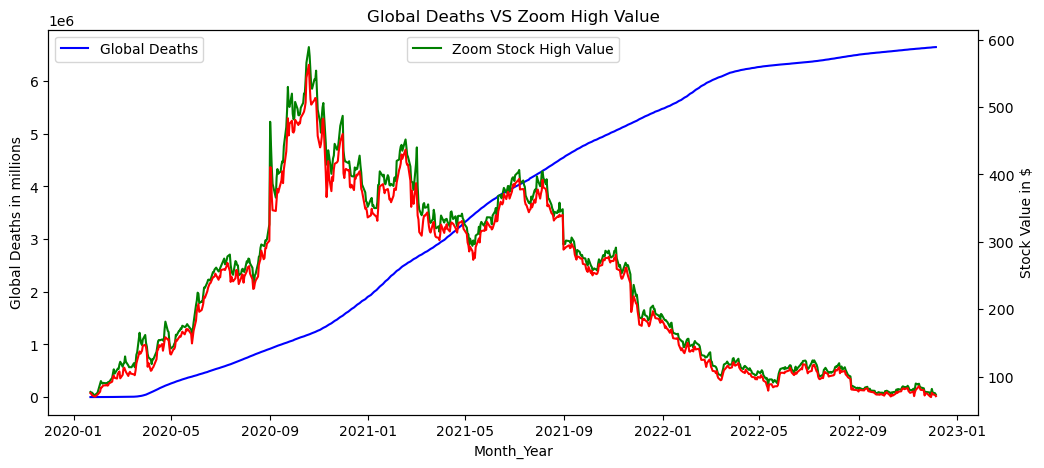

In [ ]:
# Creating plot based on Global Deaths, and date wise Zoom Stock Values
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
x = final_df['Date']
ax.set_title('Global Deaths VS Zoom High Value')
ax.set_xlabel('Month_Year')
ax.plot(x, final_df['Global_Deaths'], color='blue')
ax2.plot(x, final_df['ZM_H'], color='green')
ax2.plot(x, final_df['ZM_L'], color='red')
ax.set_ylabel('Global Deaths in millions')
ax2.set_ylabel('Stock Value in $')
ax.legend(['Global Deaths'])
ax2.legend(['Zoom Stock High Value'], loc='upper center')
plt.show()

* Based on the visualization we can infer that, the stocks were performing well intially till death tolls shot up and the stocks didn't dall but went up again as people started to use zoom more and more